# GDELT Project Queries

In [225]:
from google.cloud import bigquery
from google.oauth2 import service_account
from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:


key_path = "/home/sitwala/linuxdevs/DSI/twist3/ageless-airship-347507-d17d039b4b81.json"

credentials = service_account.Credentials.from_service_account_file(
    key_path, scopes=["https://www.googleapis.com/auth/cloud-platform"],
)

client = bigquery.Client(credentials=credentials, project=credentials.project_id,)

In [14]:
# list the tables in the project

dataset_ref = client.dataset("gdeltv2", project="gdelt-bq")
dataset = client.get_dataset(dataset_ref)
tables = list(client.list_tables(dataset))
for table in tables:  
    print(table.table_id)

academicliteraturegkg
cloudvision
cloudvision_partitioned
cloudvision_webentitygraph_20191020
domainsbycountry_alllangs_april2015
eventmentions
eventmentions_partitioned
events
events-2021-12-08T11_17_17
events_partitioned
gal
gdg_partitioned
geg_g1
geg_gcnlapi
geg_gcnlapisent
geg_iatv
gegv2_iatv
gemg
gfg_linguistic1grams_20190831
gfg_linguistic2grams_20190831
gfg_linguisticinventory_20190901
gfg_outlet1grams_20190831
gfg_outlet2grams_20190831
gfg_partitioned
ggg
gkg
gkg_partitioned
gkg_socialoutlinks
gng
gqg
grg_dtn
grg_vcn
grg_vcn_nlpapi
gsg
gsg_docembed
gsg_iatvsentembed
iaradio_1grams
iaradio_2grams
iaradio_3grams
iaradio_4grams
iaradio_5grams
iatv_1grams
iatv_1gramsv2
iatv_2grams
iatv_2gramsv2
iatv_3gramsv2
iatv_4gramsv2
iatv_5gramsv2
iatv_aif_captime
iatv_aif_vidtime
iatv_lowerthird
iatv_lowerthirdclusters
iatv_showinventory
iatv_timeinventory
iatvgkg
readability
readability_iatv
vgeg_iatv
vgegv2_iatv
web_1grams
web_2grams
web_pos
webngrams


In [6]:
# check columns in the event data
query = """
        SELECT *
        FROM `gdelt-bq.gdeltv2.INFORMATION_SCHEMA.COLUMNS`
        where table_catalog="gdelt-bq" and table_schema="gdeltv2" and table_name="events"
        """
query_job = client.query(query)
columns = query_job.to_dataframe()
columns.to_csv("columns_event.csv")

In [8]:
query = """
        SELECT *
        FROM `gdelt-bq.gdeltv2.INFORMATION_SCHEMA.COLUMNS`
        where table_catalog="gdelt-bq" and table_schema="gdeltv2" and table_name="gkg"
        """

# Set use_legacy_sql to True to use legacy SQL syntax.
job_config = bigquery.QueryJobConfig(use_legacy_sql=False)

query_job = client.query(query, job_config=job_config)
columns = query_job.to_dataframe()
columns.to_csv("columns_gkg.csv")

In [11]:
# function to run queries

def run_bigquery(query, legacy= False):
    job_config = bigquery.QueryJobConfig(use_legacy_sql=legacy)

    query_job = client.query(query, job_config=job_config)
    return  query_job.to_dataframe()
    

In [10]:
query = """
        SELECT *
        FROM `gdelt-bq.gdeltv2.INFORMATION_SCHEMA.COLUMNS`
        where table_catalog="gdelt-bq" and table_schema="gdeltv2" and table_name="gkg"
        """


In [12]:
data = run_bigquery(query,False)
data.head()

,table_catalog,table_schema,table_name,column_name,ordinal_position,is_nullable,data_type,is_generated,generation_expression,is_stored,is_hidden,is_updatable,is_system_defined,is_partitioning_column,clustering_ordinal_position
0,gdelt-bq,gdeltv2,gkg,GKGRECORDID,1,YES,STRING,NEVER,None,None,NO,None,NO,NO,<NA>
1,gdelt-bq,gdeltv2,gkg,DATE,2,YES,INT64,NEVER,None,None,NO,None,NO,NO,<NA>
2,gdelt-bq,gdeltv2,gkg,SourceCollectionIdentifier,3,YES,INT64,NEVER,None,None,NO,None,NO,NO,<NA>
3,gdelt-bq,gdeltv2,gkg,SourceCommonName,4,YES,STRING,NEVER,None,None,NO,None,NO,NO,<NA>
4,gdelt-bq,gdeltv2,gkg,DocumentIdentifier,5,YES,STRING,NEVER,None,None,NO,None,NO,NO,<NA>


In [167]:
query_zambia_full = """
SELECT  *
FROM (
select REGEXP_EXTRACT(SPLIT(V2Locations,';'),r'^[1]#(.*?)#ZA#') as location,  GKGRECORDID, Quotations, V2Tone, Persons, V2Themes
from [gdelt-bq.gdeltv2.gkg_partitioned]
where _PARTITIONTIME >= TIMESTAMP("2021-01-1") and  _PARTITIONTIME <= TIMESTAMP("2022-04-17") and V2Themes like '%ECON_DEBT%'
)
where location is not null
"""


In [168]:
#data = run_bigquery(query_zambia_full,legacy=True)
data.to_parquet('zambia_full_year.parquet.gzip',
              compression='gzip')
data.head()

,location,GKGRECORDID,Quotations,V2Tone,Persons,V2Themes
0,Zambia,20210119181500-T119,None,"1.56657963446475,2.34986945169713,0.7832898172...",None,"TAX_FNCACT_DIRECTOR,1056;NEGOTIATIONS,2033;TAX..."
1,Zambia,20210119160000-T209,None,"1.55440414507772,2.33160621761658,0.7772020725...",None,"TAX_FNCACT_DIRECTOR,1066;NEGOTIATIONS,2057;TAX..."
2,Zambia,20210119153000-1713,None,"-7.57238307349666,0.89086859688196,8.463251670...",None,"TAX_FNCACT_PEERS,1509;USPEC_POLICY1,13;USPEC_P..."
3,Zambia,20210119153000-1713,None,"-7.57238307349666,0.89086859688196,8.463251670...",None,"TAX_FNCACT_PEERS,1509;USPEC_POLICY1,13;USPEC_P..."
4,Zambia,20210616134500-1398,None,"0.426439232409382,2.13219616204691,1.705756929...",None,"SLFID_ECONOMIC_DEVELOPMENTAID,2610;SLFID_ECONO..."


In [169]:
# check if the record IDs repeat

data['GKGRECORDID'].duplicated().any()

True

In [170]:
data = data.drop_duplicates(subset=['GKGRECORDID']).copy()
data['GKGRECORDID'].duplicated().any()

False

In [171]:
df =data.copy()
#df.loc[df['Persons'].str.contains("hakainde", na=False, regex= True)]


In [147]:
def get_date_from_code(text):
    # function takes the GKGRECORDID and returns the date
    date = text[:8]
    date = datetime.strptime(date, '%Y%m%d')
    

    return pd.to_datetime(date)

    

In [98]:

def get_tone(text,index):
    # function takes the tone column (text) and can return a tone metric based on index
    # average tone index 0
    # average polarity index 3
    return float(text.split(sep=",")[index])



In [256]:
# Add Average Tone column from V2Tone
# Add Average polarity

df["date"] = df["GKGRECORDID"].apply(lambda x: get_date_from_code(x))
df["Avg_tone"] = df["V2Tone"].apply(lambda x: get_tone(x,0))
df["polarity"] = df["V2Tone"].apply(lambda x: get_tone(x,3))


df['date'] = pd.to_datetime(df['date'])
df['month_year'] = df["date"].apply(lambda x: x.strftime('%Y-%m'))
df.head()

,location,GKGRECORDID,Quotations,V2Tone,Persons,V2Themes,date,Avg_tone,polarity,month_year
0,Zambia,20210119181500-T119,None,"1.56657963446475,2.34986945169713,0.7832898172...",None,"TAX_FNCACT_DIRECTOR,1056;NEGOTIATIONS,2033;TAX...",2021-01-19,1.566580,3.133159,2021-01
1,Zambia,20210119160000-T209,None,"1.55440414507772,2.33160621761658,0.7772020725...",None,"TAX_FNCACT_DIRECTOR,1066;NEGOTIATIONS,2057;TAX...",2021-01-19,1.554404,3.108808,2021-01
2,Zambia,20210119153000-1713,None,"-7.57238307349666,0.89086859688196,8.463251670...",None,"TAX_FNCACT_PEERS,1509;USPEC_POLICY1,13;USPEC_P...",2021-01-19,-7.572383,9.354120,2021-01
4,Zambia,20210616134500-1398,None,"0.426439232409382,2.13219616204691,1.705756929...",None,"SLFID_ECONOMIC_DEVELOPMENTAID,2610;SLFID_ECONO...",2021-06-16,0.426439,3.837953,2021-06
6,Zambia,20211031083000-T817,None,"2.35294117647059,5,2.64705882352941,7.64705882...",None,"WB_1305_HEALTH_SERVICES_DELIVERY,5235;ENV_HYDR...",2021-10-31,2.352941,7.647059,2021-10


In [250]:
# check for nulls in the Avgtone
df.Avg_tone.isna().sum()

0

In [258]:
grouped_date = df.groupby("date", dropna=True, as_index= False)["Avg_tone"].mean()
grouped_date.head() 

,date,Avg_tone
0,2021-01-01,-3.723040
1,2021-01-02,-3.951555
2,2021-01-03,-2.388748
3,2021-01-04,-2.171266
4,2021-01-05,-4.362609


In [334]:
grouped_date = df.groupby("date", dropna=True, as_index= False)["Avg_tone"].mean().reset_index(0,drop=True)
grouped_date["rolling_avg_tone"] = grouped_date["Avg_tone"].rolling(14, center = True).median()
df_shifted = grouped_date[7:]
df_shifted.head()

,date,Avg_tone,rolling_avg_tone
7,2021-01-08,-2.812865,-2.513610
8,2021-01-09,-2.056560,-2.280007
9,2021-01-10,-1.787765,-2.113913
10,2021-01-11,-1.598138,-1.944892
11,2021-01-12,-1.187090,-1.944892


In [335]:
df.Avg_tone.describe()

count    7623.000000
mean       -1.948651
std         2.838491
min       -15.714286
25%        -3.893010
50%        -1.880878
75%         0.000000
max         9.090909
Name: Avg_tone, dtype: float64

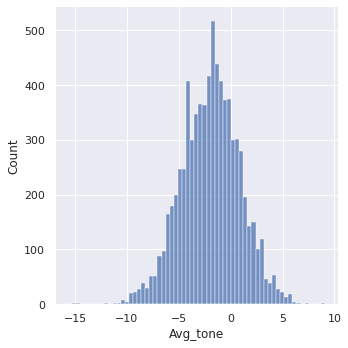

In [336]:
sns.displot(df.Avg_tone)

<AxesSubplot:xlabel='month_year', ylabel='Avg_tone'>

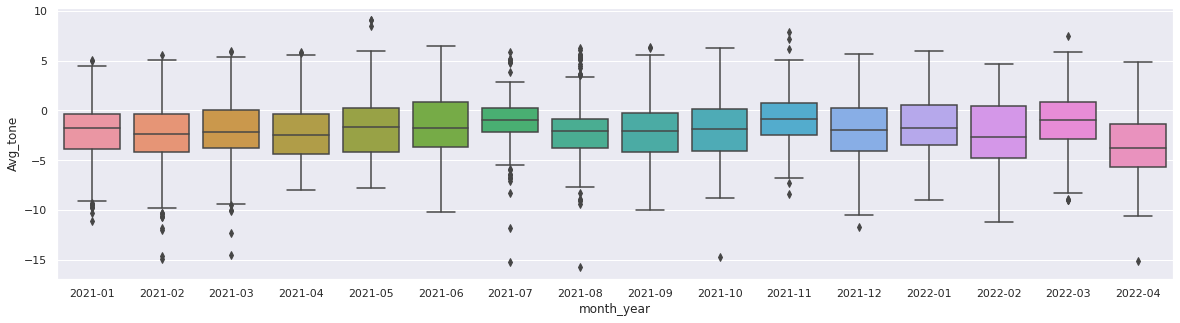

In [337]:
sns.set()
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x="month_year", y="Avg_tone", data=df.sort_values(by="month_year"))

<AxesSubplot:xlabel='date', ylabel='Avg_tone'>

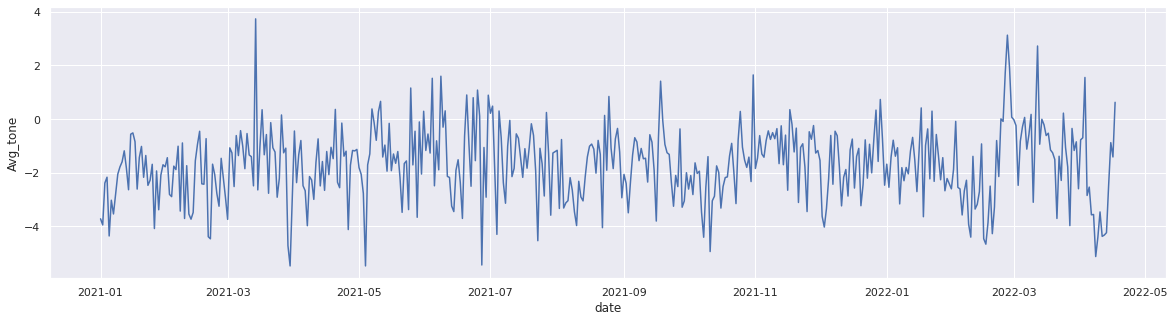

In [338]:
fig, ax = plt.subplots(figsize=(20,5))
sns.lineplot(x=grouped_date.date, y=grouped_date.Avg_tone)

<AxesSubplot:xlabel='date', ylabel='rolling_avg_tone'>

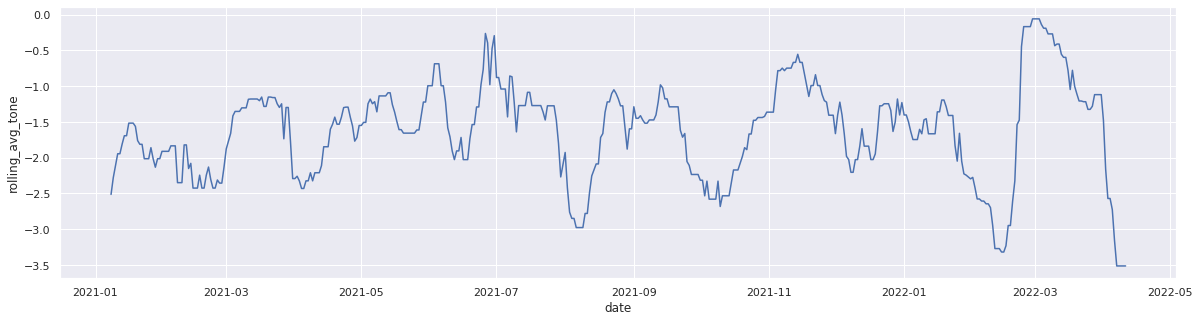

In [339]:
fig, ax = plt.subplots(figsize=(20,5))
sns.lineplot(x=df_shifted.date, y=df_shifted.rolling_avg_tone)


# check the different sentiments for economic growth for the two presidents

In [340]:
lungu_df = df[df['Persons'].str.contains("edgar lungu|president lungu", regex=True, na = False) & (df['Persons'].str.contains("hakainde hichilema|hh|president hichilema", regex=True, na = False)  == False)]
hh_df = df[df['Persons'].str.contains("hakainde hichilema|hh|president hichilema", regex=True, na = False) & (df['Persons'].str.contains("edgar lungu|president lungu", regex=True, na = False) == False)]

In [341]:
lungu_df.Avg_tone.describe()

count    275.000000
mean      -2.234931
std        2.332609
min      -11.783439
25%       -3.425246
50%       -1.720841
75%       -1.125704
max        6.018519
Name: Avg_tone, dtype: float64

In [342]:
hh_df.Avg_tone.describe()

count    315.000000
mean      -1.923895
std        2.778922
min       -9.009009
25%       -3.910252
50%       -2.281369
75%        0.185720
max        5.643739
Name: Avg_tone, dtype: float64

In [343]:
lungu_tones =  pd.DataFrame({"president": "Lungu", "Avg_tone": lungu_df.Avg_tone})
hh_tones = pd.DataFrame({"president": "HH", "Avg_tone": hh_df.Avg_tone})

combined = pd.concat([lungu_tones,hh_tones], axis=0)

combined.head()

,president,Avg_tone
3919,Lungu,-4.193548
3924,Lungu,6.018519
3929,Lungu,-2.189781
3934,Lungu,-3.389831
3935,Lungu,-3.280840


<AxesSubplot:xlabel='president', ylabel='Avg_tone'>

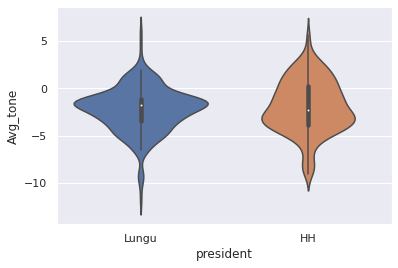

In [344]:
sns.violinplot(x="president", y="Avg_tone", data = combined)